## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?



In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# import tensorflow as tf
# print(tf.__version__)
# msg = tf.constant('TensorFlow 2.0 Hello World')
# tf.print(msg)
# x = tf.random.uniform([3, 3])
# print("есть ли доступные GPU: "),
# print(tf.config.experimental.list_physical_devices("GPU"))
# print("тензор на GPU #0:  "),
# print(x.device.endswith('GPU:0'))

******************

In [15]:
boston = load_boston()
X = boston['data']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['target'])
data = pd.concat([X, y], axis=1)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
def model_test(X_train: pd.DataFrame,
               y_train: pd.DataFrame,
               n_layers: int = 2,
               n_neurons: int = 128,
               n_epochs: int = 15,
               batch_size: int = 1500,
               validation_split: float = 0.2,
               activation: str = 'sigmoid',
               optimizer: str = 'adam',
               loss: str = 'mse'
               ):
    inputs = Input(shape=(13))
    x = Dense(n_neurons, activation=activation)(inputs)
    if n_layers > 2:
        for i in range(n_layers-1):
            x = Dense(int(n_neurons), activation=activation)(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
    model.fit(X, y, epochs=n_epochs, batch_size=batch_size, verbose=0)

    return model

In [18]:
result_df = pd.DataFrame(columns=['Число слоев',
                                  'Число нейронов скрытого слоя',
                                  'Оптимизатор',
                                  'Функция активации',
                                  'Функция потерь',
                                  'train_mse',
                                  'test_mse'])

In [19]:
lr = 0.001
layers = [2, 3, 4]
neurons = [64, 128, 196]
optimizers = [keras.optimizers.RMSprop(learning_rate=lr), keras.optimizers.SGD(
    learning_rate=lr), keras.optimizers.Adam(learning_rate=lr), keras.optimizers.Nadam(learning_rate=lr)]
f_activations = ['relu', 'sigmoid', 'tanh']
losses = ['mse', 'mae']

In [20]:
results = []
for n_layers in layers:
    for n_neurons in neurons:
        for optimizer in optimizers:
            for activation in f_activations:
                for loss in losses:
                    result_dict = {}

                    model = model_test(X_train, y_train,
                                       n_layers=n_layers,
                                       n_neurons=n_neurons,
                                       n_epochs=1500,
                                       activation=activation,
                                       optimizer=optimizer,
                                       loss=loss
                                       )
                    _, metric_train = model.evaluate(
                        X_train, y_train, batch_size=1000, verbose=0)
                    _, metric_test = model.evaluate(
                        X_test, y_test, batch_size=1000, verbose=0)
                    result_dict = {'Число слоев': n_layers,
                                   'Число нейронов скрытого слоя': n_neurons,
                                   'Оптимизатор': optimizer.__class__.__name__,
                                   'Функция активации': activation,
                                   'Функция потерь': loss,
                                   'train_mse': metric_train,
                                   'test_mse': metric_test}
                    result_df = result_df.append(
                        result_dict, ignore_index=True)

In [21]:
result_df = result_df.sort_values(by=['test_mse'])
result_df.head(15)

,Число слоев,Число нейронов скрытого слоя,Оптимизатор,Функция активации,Функция потерь,train_mse,test_mse
208,4,196,Adam,tanh,mse,0.075833,0.063912
137,3,196,Adam,tanh,mae,0.239820,0.079753
184,4,128,Adam,tanh,mse,0.138838,0.119488
214,4,196,Nadam,tanh,mse,0.164751,0.144331
136,3,196,Adam,tanh,mse,0.184869,0.147020
191,4,128,Nadam,tanh,mae,0.237263,0.150713
215,4,196,Nadam,tanh,mae,0.175038,0.150801
143,3,196,Nadam,tanh,mae,0.214845,0.158382
209,4,196,Adam,tanh,mae,0.295761,0.158813
180,4,128,Adam,relu,mse,0.183136,0.190957


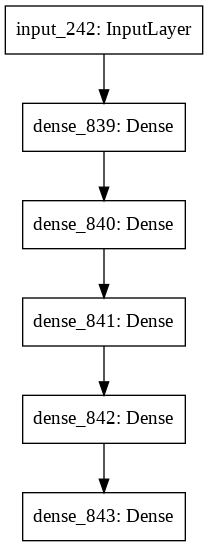

In [22]:
plot_model(model)

**Вывод:** в общем случае увеличение числа нейронов и числа скртых слоев (с учетом того, что модель излишне не усложнялась) улучшает модель. Лучшие результаты показали модели с функцией потерь ***MSE***, функцией активации ***tanh*** и оптимизатором ***Adam***.